In [4]:
## 1.1 import libarary
## data manipulatioon and analysis
import pandas  as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

## statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency,pearsonr,spearmanr
## machine learning 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")




In [5]:
## Load dataset
df = pd.read_csv('hyperlocal_economy_data (1).csv')


In [6]:
print(f"data shape: {df.shape[0]} rows * {df.shape[1]} columns")

data shape: 200 rows * 35 columns


In [7]:
## memory usage
print(f"{df.memory_usage(deep=True).sum()/1024**2} MB")

0.21905994415283203 MB


In [8]:
## first look into the data
#print(df.head())

In [9]:
display(df.head())

,area_id,area_name,city,area_type,locality_type,pincode,retail_shops,restaurants,banks_atms,medical_facilities,educational_centers,parking_lots,vacant_shops,pedestrian_count_15min,vehicle_count_15min,footfall_intensity,road_condition,street_lighting,cleanliness,avg_daily_customers,avg_transaction_value,monthly_rent,business_growth,property_price_sqft,residential_rent_1bhk,property_trend,google_rating,google_reviews_count,zomato_restaurants,population_estimate,last_survey_date,competition_level,parking_availability,main_issue,news_mentions_6months
0,AREA_001,Sector 17 Market,Patiala,Urban,Commercial,143684.00,43.00,27.00,10.00,5,4,3.00,3,275,149,High,5.00,5,4.00,130.00,1324,31848.00,Growing,6245,19108.00,Falling,4.50,670.00,27.00,37039.00,2025-01-05,High,Easy,Poor infrastructure,13.00
1,AREA_002,Sector 22,Chandigarh,Semi-Urban,Mixed,141220.00,25.00,13.00,7.00,5,1,0.00,4,116,51,Medium,3.00,3,3.00,76.00,763,16898.00,Growing,4807,10138.00,Falling,4.10,1453.00,13.00,33023.00,2025-01-23,Low,Easy,High rent,9.00
2,AREA_003,Sector 35,Patiala,Urban,Commercial,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,177,NaN,6.00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Falling,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN
3,AREA_004,Sector 43,Patiala,Urban,Commercial,148023.00,51.00,21.00,12.00,8,6,4.00,6,278,104,High,4.00,4,4.00,181.00,1175,40822.00,Growing,7361,24493.00,Rising,4.30,2483.00,21.00,30350.00,2025-01-17,High,Moderate,High rent,16.00
4,AREA_005,Sector 8,Zirakpur,Urban,Mixed,148450.00,28.00,17.00,10.00,7,5,3.00,1,144,67,Medium,5.00,4,4.00,78.00,1388,33258.00,Growing,6404,19954.00,Falling,3.40,1897.00,17.00,46404.00,2025-01-07,High,Moderate,High rent,8.00


In [10]:
display(df.sample(5))

,area_id,area_name,city,area_type,locality_type,pincode,retail_shops,restaurants,banks_atms,medical_facilities,educational_centers,parking_lots,vacant_shops,pedestrian_count_15min,vehicle_count_15min,footfall_intensity,road_condition,street_lighting,cleanliness,avg_daily_customers,avg_transaction_value,monthly_rent,business_growth,property_price_sqft,residential_rent_1bhk,property_trend,google_rating,google_reviews_count,zomato_restaurants,population_estimate,last_survey_date,competition_level,parking_availability,main_issue,news_mentions_6months
97,AREA_098,Nilokheri,Amritsar,Semi-Urban,Residential,149160.00,18.00,10.00,7.00,5,4,3.00,3,61,41,Medium,3.00,4,2.00,30.00,1028,20282.00,Declining,4022,12169.00,Falling,4.20,1105.00,10.00,28286.00,2025-01-12,Medium,Moderate,High rent,8.00
99,AREA_100,Sector 22 Zone 2,Panchkula,Urban,Residential,142062.00,11.00,5.00,6.00,4,7,4.00,0,31,12,Medium,5.00,5,3.00,19.00,1311,5891.00,Growing,2270,3534.00,Rising,3.20,853.00,5.00,47766.00,2025-01-09,Low,Easy,parking shortage,NaN
24,AREA_025,Phase 10,Solan,Semi-Urban,Commercial,141982.00,34.00,15.00,8.00,6,3,0.00,6,70,39,Medium,4.00,4,3.00,41.00,896,19290.00,Growing,3604,11574.00,Stable,3.80,1645.00,15.00,27190.00,2025-01-01,Low,Easy,Low footfall,NaN
77,AREA_078,Nakodar,Panchkula,Semi-Urban,Commercial,141733.00,23.00,8.00,8.00,4,1,1.00,4,90,49,Medium,3.00,4,3.00,40.00,1193,20424.00,Declining,3858,12254.00,Falling,3.70,1360.00,8.00,19737.00,2025-01-17,Low,Easy,Poor infrastructure,5.00
116,AREA_117,Dhanas Zone 2,Amritsar,Semi-Urban,Commercial,143768.00,16.00,13.00,5.00,4,5,1.00,3,85,54,Medium,3.00,3,3.00,27.00,886,20496.00,Growing,4578,12297.00,Rising,3.70,567.00,13.00,32845.00,2025-01-14,Low,Easy,parking shortage,11.00


In [11]:
## phase 2 
## data understanding and quality assess.
print("DATASET INFO:")
df.info()

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_id                 200 non-null    object 
 1   area_name               200 non-null    object 
 2   city                    200 non-null    object 
 3   area_type               200 non-null    object 
 4   locality_type           200 non-null    object 
 5   pincode                 182 non-null    float64
 6   retail_shops            188 non-null    float64
 7   restaurants             185 non-null    float64
 8   banks_atms              175 non-null    float64
 9   medical_facilities      200 non-null    int64  
 10  educational_centers     200 non-null    int64  
 11  parking_lots            162 non-null    float64
 12  vacant_shops            192 non-null    object 
 13  pedestrian_count_15min  185 non-null    object 
 14  vehicle_count_15min     200 

In [12]:
column_info=pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'non-null count': df.count().values,
    'null count':df.isnull().sum().values
})

display(column_info)

,Column,Data Type,non-null count,null count
0,area_id,object,200,0
1,area_name,object,200,0
2,city,object,200,0
3,area_type,object,200,0
4,locality_type,object,200,0
5,pincode,float64,182,18
6,retail_shops,float64,188,12
7,restaurants,float64,185,15
8,banks_atms,float64,175,25
9,medical_facilities,int64,200,0


In [13]:
## Observation template
print("KEY OBSERVATION:")
print(f"total vriables:{df.shape[1]}")
print(f"numerical varibales: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"total categorical columns:{df.select_dtypes(include=object).shape[1]}")
print(f"total missing values: {df.isnull().sum().sum()}")
print(f" duplicate rows: {df.duplicated().sum()}")

KEY OBSERVATION:
total vriables:35
numerical varibales: 19
total categorical columns:16
total missing values: 484
 duplicate rows: 0


In [14]:
## stat summary
display(df.describe().T.style.background_gradient(cmap='YlOrRd'))

,count,mean,std,min,25%,50%,75%,max
pincode,182.000000,144888.532967,2945.368259,140030.000000,142427.000000,144589.500000,147537.000000,149992.000000
retail_shops,188.000000,28.595745,16.528258,5.000000,16.750000,25.000000,34.000000,69.000000
restaurants,185.000000,13.172973,8.015767,2.000000,8.000000,11.000000,15.000000,34.000000
banks_atms,175.000000,6.457143,2.745350,2.000000,4.000000,7.000000,8.000000,12.000000
medical_facilities,200.000000,4.300000,2.191807,1.000000,3.000000,4.000000,6.000000,9.000000
educational_centers,200.000000,3.575000,1.611633,1.000000,2.000000,4.000000,5.000000,7.000000
parking_lots,162.000000,2.160494,1.482459,0.000000,1.000000,2.000000,3.000000,5.000000
vehicle_count_15min,200.000000,57.805000,40.913525,7.000000,30.000000,48.000000,71.000000,183.000000
road_condition,193.000000,3.725389,0.990700,2.000000,3.000000,4.000000,4.000000,6.000000
street_lighting,200.000000,3.695000,0.839942,2.000000,3.000000,4.000000,4.000000,5.000000


In [15]:
display(df.describe(include=object).T.style.background_gradient(cmap='YlOrRd'))

,count,unique,top,freq
area_id,200,200,AREA_001,1
area_name,200,196,Sector 9 Zone 2,2
city,200,12,Zirakpur,25
area_type,200,3,Semi-Urban,102
locality_type,200,3,Commercial,84
vacant_shops,192,16,3,40
pedestrian_count_15min,185,114,111,6
footfall_intensity,192,3,Medium,122
avg_transaction_value,175,161,1486,3
business_growth,182,3,Declining,91


In [16]:
##missing value analysis
missing_data=pd.DataFrame({
    'Column': df.columns,
    'missing_counts':df.isnull().sum().values,
    'missing_perct':(df.isnull().sum()/len(df)*100).round(2).values
})

In [17]:
display(missing_data)

,Column,missing_counts,missing_perct
0,area_id,0,0.00
1,area_name,0,0.00
2,city,0,0.00
3,area_type,0,0.00
4,locality_type,0,0.00
5,pincode,18,9.00
6,retail_shops,12,6.00
7,restaurants,15,7.50
8,banks_atms,25,12.50
9,medical_facilities,0,0.00


In [18]:
missing_data=missing_data[missing_data['missing_counts']>0].sort_values('missing_perct')

In [19]:
display(missing_data)

,Column,missing_counts,missing_perct
16,road_condition,7,3.50
12,vacant_shops,8,4.00
15,footfall_intensity,8,4.00
6,retail_shops,12,6.00
29,population_estimate,12,6.00
18,cleanliness,12,6.00
7,restaurants,15,7.50
30,last_survey_date,15,7.50
13,pedestrian_count_15min,15,7.50
21,monthly_rent,15,7.50


<Figure size 1200x600 with 0 Axes>

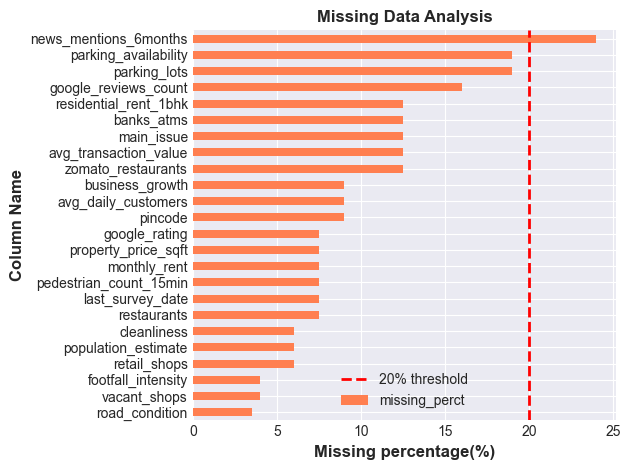

In [20]:
## viz missing data
plt.figure(figsize=(12,6))
missing_data.plot(kind='barh',x='Column',y='missing_perct',color='coral')
plt.xlabel('Missing percentage(%)',fontsize=12,fontweight='bold')
plt.ylabel('Column Name',fontsize=12, fontweight='bold')
plt.title('Missing Data Analysis',fontsize=12,fontweight='bold')
plt.axvline(x=20, color='red',linestyle='--',linewidth=2,label='20% threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
for col in df.select_dtypes(include='object').columns:
    ## check for the datetime format
    datetime_conv=pd.to_datetime(df[col],errors='coerce')
    ## if most of the valuee are date time
    if datetime_conv.notna().mean() > 0.8:
        print(f"column {col} is stored as object but should be datetime")
        # sample values
        print(f" sample values: {df[col].dropna().head(3).tolist()}")
        print('--'*50)

        ## check for numeric columns
    numeric_conv=pd.to_numeric(df[col],errors='coerce')
    if numeric_conv.notna().mean() > 0.8:
        print(f"column {col} is stored as object but should be numeric")
        print(f" sample values: {df[col].dropna().head(3).tolist()}")
        print(f"Numric conversion sucess count: {numeric_conv.notna().sum()}")
        print('--'*50)

       

column vacant_shops is stored as object but should be numeric
 sample values: ['3', '4', '6']
Numric conversion sucess count: 188
----------------------------------------------------------------------------------------------------
column pedestrian_count_15min is stored as object but should be numeric
 sample values: ['275', '116', '278']
Numric conversion sucess count: 181
----------------------------------------------------------------------------------------------------
column avg_transaction_value is stored as object but should be numeric
 sample values: ['1324', '763', '1175']
Numric conversion sucess count: 168
----------------------------------------------------------------------------------------------------
column property_price_sqft is stored as object but should be numeric
 sample values: ['6245', '4807', '7361']
Numric conversion sucess count: 181
----------------------------------------------------------------------------------------------------
column last_survey_date is 

In [22]:
## 3 Data cleaning and processing
# 3.1 create data backup
df_raw=df.copy()
print(f"Backup shape: {df_raw.shape}")

Backup shape: (200, 35)


In [23]:
## fix data types
## function to clean numeric data
def clean_numeric_columns(series,column_name):
    print(f" cleaning: {column_name}")
    print(f" before-type: {series.dtype},sample: {series.dropna().head(2).tolist}")
    ## convert to string
    series=series.astype(str)
    ## remove common patterns 
    series=series.str.replace('Rs','',regex=False)
    series=series.str.replace('/-','',regex=False)
    series=series.str.replace('~','',regex=False)
    series=series.str.replace('shops','',regex=False)
    series=series.str.replace(' ','',regex=False)

    series = series.str.strip()

    # replace "NA", "nan", etc with NaN
    series=series.replace(['NA','na','nan','NaN','None',''],np.nan)
    ## convert ot numeric
    series=pd.to_numeric(series,errors='coerce')

    ## after cleaning status
    print(f'After-type: {series.dtype}, sample: {series.dropna().head(2).tolist()}')
    print("conversion complete")
    return series


In [24]:
## call your function
df['avg_transaction_value']=clean_numeric_columns(df['avg_transaction_value'],'avg_transaction_value')
print('--'*50)
df['vacant_shops']=clean_numeric_columns(df['vacant_shops'],'vacant_shops')
print('--'*50)
df['pedestrian_count_15min']=clean_numeric_columns(df['pedestrian_count_15min'],'pedestrian_count')
print('--'*50)
df['property_price_sqft']=clean_numeric_columns(df['property_price_sqft'],'property_price_sqft')

 cleaning: avg_transaction_value
 before-type: object,sample: <bound method IndexOpsMixin.tolist of 0    1324
1     763
Name: avg_transaction_value, dtype: object>
After-type: float64, sample: [1324.0, 763.0]
conversion complete
----------------------------------------------------------------------------------------------------
 cleaning: vacant_shops
 before-type: object,sample: <bound method IndexOpsMixin.tolist of 0    3
1    4
Name: vacant_shops, dtype: object>
After-type: float64, sample: [3.0, 4.0]
conversion complete
----------------------------------------------------------------------------------------------------
 cleaning: pedestrian_count
 before-type: object,sample: <bound method IndexOpsMixin.tolist of 0    275
1    116
Name: pedestrian_count_15min, dtype: object>
After-type: float64, sample: [275.0, 116.0]
conversion complete
----------------------------------------------------------------------------------------------------
 cleaning: property_price_sqft
 before-type: o

In [25]:
## Standardize date format
#function
def standardize_date(date_series):
    date_series=pd.to_datetime(date_series,errors='coerce',format='mixed',dayfirst=True)
    return date_series



In [26]:
df['last_survey_date']=standardize_date(df['last_survey_date'])
print(f"sample values : {df['last_survey_date'].dropna().head(3).tolist()}")

sample values : [Timestamp('2025-01-05 00:00:00'), Timestamp('2025-01-23 00:00:00'), Timestamp('2025-01-17 00:00:00')]


In [27]:
# Handle missing values
# Fill numeric columns 
numeric_cols_to_fill=['retail_shops','restaurants','banks_atms','medical_facilities','parking_lots','monthly_rent']
for col in numeric_cols_to_fill:
    if col in df.columns and df[col].isnull().sum() > 0:
        # fill with median group by area_type locality_type	
        df['col']=df.groupby(['area_type','locality_type'])[col].transform(lambda x: x.fillna(x.median()))
        print(f'{col} : Filled {df[col].isnull().sum()} missing values with group median')




retail_shops : Filled 12 missing values with group median
restaurants : Filled 15 missing values with group median
banks_atms : Filled 25 missing values with group median
parking_lots : Filled 38 missing values with group median
monthly_rent : Filled 15 missing values with group median


In [28]:
## Fill categorical columns with mode
categorical_cols_to_fill= ['footfall_intensity','business_growth','parking_availability','main_issue']
for col in categorical_cols_to_fill:
    if col in df.columns and df[col].isnull().sum() >0:
        mode_value= df[col].mode()[0] if len (df[col].mode()) > 0 else 'Unknown'
        df[col].fillna(mode_value,inplace=True)
        print(f" {col}: filled with mode ({mode_value})")


 footfall_intensity: filled with mode (Medium)
 business_growth: filled with mode (Declining)
 parking_availability: filled with mode (Easy)
 main_issue: filled with mode (High rent)


In [29]:
## KNN IMPUTATION CORRELATED NUMERIC FEATURE
correlated_features=['pedestrian_count_15min','vehicle_count_15min','avg_daily_customers','avg_transaction_value']
if any(df[col].isnull().sum() > 0 for col in correlated_features if col in df.columns ):
    ## KNNImputation
    imputer=KNNImputer(n_neighbors=5)
    df[correlated_features]=imputer.fit_transform(df[correlated_features])

In [30]:
## check the remaining missing values
remaining_missing=df.isnull().sum().sum()
print(f" Reaminig missing values are : {remaining_missing}")

 Reaminig missing values are : 337


In [31]:
## cleaning impact
print(f"""
Before cleaning :
{df_raw.isnull().sum().sum()}
({df_raw.isnull().sum().sum()/(df_raw.shape[0]*df_raw.shape[1])*100})

After cleaning :
{df.isnull().sum().sum()}
({df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100})
""")


Before cleaning :
484
(6.914285714285715)

After cleaning :
337
(4.680555555555556)



,Column,Outlier_count
0,retail_shops,14
1,monthly_rent,13
2,property_price_sqft,11
3,pedestrian_count_15min,31


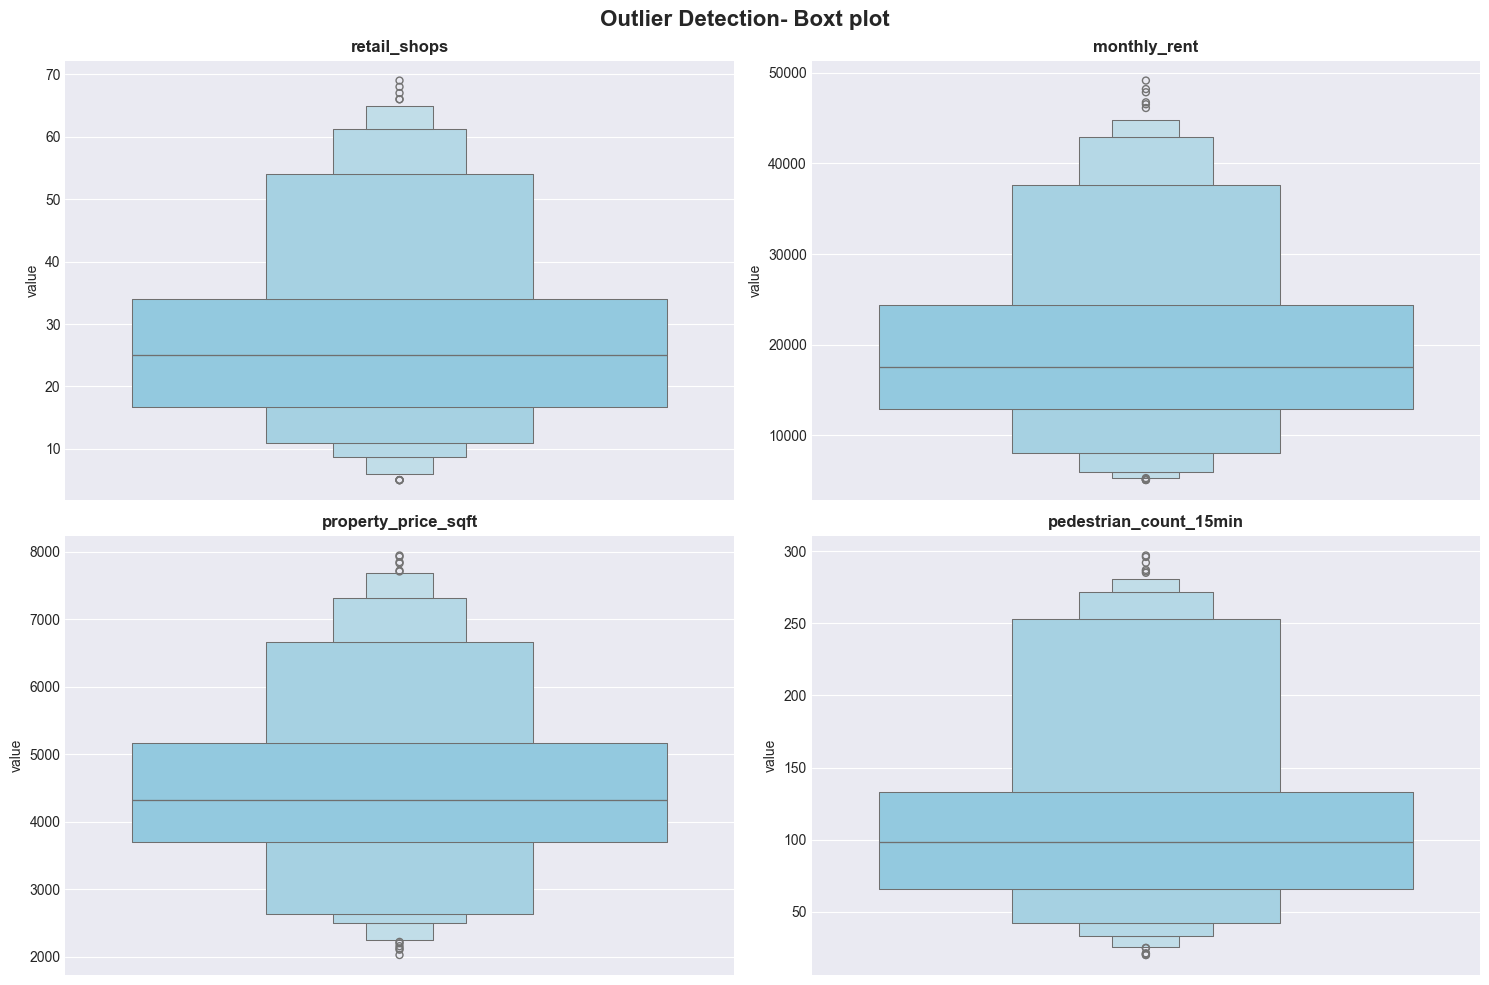

In [32]:
## outlier detection
# function to detect the outliers using IQR methode
def detect_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5* IQR
    upper_bound=Q3+1.5* IQR
    outliers=df[(df[column] < lower_bound) | (df[column]> upper_bound)]
    return outliers, lower_bound, upper_bound



## check key numeric col for outliers
outliers_columns=['retail_shops','monthly_rent','property_price_sqft','pedestrian_count_15min']
outlier_summary=[]
for col in outliers_columns:
    if col in df.columns:
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df,col)
        outlier_summary.append({
            'Column':col,
            'Outlier_count':len(outliers)
        })
outlier_df=pd.DataFrame(outlier_summary)
display(outlier_df)

## visualize outliers
import matplotlib.pyplot as plt
fig,axes= plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Outlier Detection- Boxt plot',fontsize=16,fontweight='bold')
for idx, col in enumerate(outliers_columns):
    if col in df.columns:
        ax=axes[idx//2,idx%2]
        sns.boxenplot(y=df[col],ax=ax,color='skyblue')
        ax.set_title(f"{col}",fontsize=12,fontweight='bold')
        ax.set_ylabel('value')
plt.tight_layout()
plt.show()


In [36]:
##apply winsoriation to extreme outliers
from scipy.stats.mstats import winsorize
extreme_outlier_cols=['monthly_rent','property_price_sqft']
for col in extreme_outlier_cols:
    if col in df.columns:
        df[f'{col}_capped']=winsorize(df[col],limits=[0.05,0.05])
        print(f"{col} caped to 5th and 95th percentiles")

monthly_rent caped to 5th and 95th percentiles
property_price_sqft caped to 5th and 95th percentiles


In [34]:
df.head(10)

,area_id,area_name,city,area_type,locality_type,pincode,retail_shops,restaurants,banks_atms,medical_facilities,educational_centers,parking_lots,vacant_shops,pedestrian_count_15min,vehicle_count_15min,footfall_intensity,road_condition,street_lighting,cleanliness,avg_daily_customers,avg_transaction_value,monthly_rent,business_growth,property_price_sqft,residential_rent_1bhk,property_trend,google_rating,google_reviews_count,zomato_restaurants,population_estimate,last_survey_date,competition_level,parking_availability,main_issue,news_mentions_6months,col
0,AREA_001,Sector 17 Market,Patiala,Urban,Commercial,143684.00,43.00,27.00,10.00,5,4,3.00,3.00,275.00,149.00,High,5.00,5,4.00,130.00,1324.00,31848.00,Growing,6245.00,19108.00,Falling,4.50,670.00,27.00,37039.00,2025-01-05,High,Easy,Poor infrastructure,13.00,31848.00
1,AREA_002,Sector 22,Chandigarh,Semi-Urban,Mixed,141220.00,25.00,13.00,7.00,5,1,0.00,4.00,116.00,51.00,Medium,3.00,3,3.00,76.00,763.00,16898.00,Growing,4807.00,10138.00,Falling,4.10,1453.00,13.00,33023.00,2025-01-23,Low,Easy,High rent,9.00,16898.00
2,AREA_003,Sector 35,Patiala,Urban,Commercial,NaN,NaN,NaN,NaN,4,3,NaN,NaN,270.40,177.00,Medium,6.00,5,NaN,142.60,820.80,NaN,Declining,NaN,NaN,Falling,NaN,NaN,NaN,NaN,NaT,Low,Easy,High rent,NaN,38797.00
3,AREA_004,Sector 43,Patiala,Urban,Commercial,148023.00,51.00,21.00,12.00,8,6,4.00,6.00,278.00,104.00,High,4.00,4,4.00,181.00,1175.00,40822.00,Growing,7361.00,24493.00,Rising,4.30,2483.00,21.00,30350.00,2025-01-17,High,Moderate,High rent,16.00,40822.00
4,AREA_005,Sector 8,Zirakpur,Urban,Mixed,148450.00,28.00,17.00,10.00,7,5,3.00,1.00,144.00,67.00,Medium,5.00,4,4.00,78.00,1388.00,33258.00,Growing,6404.00,19954.00,Falling,3.40,1897.00,17.00,46404.00,2025-01-07,High,Moderate,High rent,8.00,33258.00
5,AREA_006,Sector 15,Chandigarh,Semi-Urban,Commercial,142246.00,31.00,15.00,4.00,3,4,0.00,5.00,83.00,57.00,Medium,4.00,4,3.00,55.00,664.00,21822.00,Stable,3576.00,13093.00,Rising,3.30,2093.00,15.00,18357.00,2025-01-06,Low,Easy,High rent,13.00,21822.00
6,AREA_007,Sector 26,Ludhiana,Semi-Urban,Mixed,144807.00,24.00,14.00,3.00,2,2,3.00,1.00,66.00,31.00,Medium,4.00,4,3.00,36.00,559.00,13210.00,Stable,4223.00,7926.00,Rising,3.90,287.00,14.00,25239.00,2025-01-17,Low,Difficult,parking shortage,9.00,13210.00
7,AREA_008,Sector 9,Shimla,Semi-Urban,Commercial,140362.00,21.00,14.00,6.00,4,4,1.00,2.00,62.00,26.00,Medium,3.00,3,2.00,19.00,813.00,15331.00,Declining,4174.00,9198.00,Stable,3.60,1906.00,14.00,23865.00,2025-01-01,Low,Easy,High rent,3.00,15331.00
8,AREA_009,Sector 11,Karnal,Rural,Mixed,NaN,NaN,NaN,NaN,1,2,NaN,NaN,46.60,21.00,Medium,6.00,3,NaN,23.00,1175.60,NaN,Declining,NaN,NaN,Rising,NaN,NaN,NaN,NaN,NaT,Low,Easy,High rent,NaN,6099.00
9,AREA_010,Sector 19,Zirakpur,Urban,Commercial,147942.00,48.00,34.00,10.00,7,7,5.00,5.00,234.00,159.00,High,5.00,4,4.00,124.00,738.00,46525.00,Declining,6658.00,27915.00,Stable,4.40,1625.00,34.00,44616.00,2025-01-03,Medium,Difficult,High rent,10.00,46525.00
